# Quantum Probability Generator

### IBM/TNS Quantum Design Jam, Team 7

In [10]:

from qiskit import * 
from qiskit import IBMQ
from qiskit.visualization import plot_histogram
from qiskit.tools.monitor import job_monitor


In [ ]:
#reference
#https://github.com/JRussellHuffman/Rothko-Bell/blob/main/Bell%20Art.ipynb
##https://github.com/qiskit-community/qiskit-community-tutorials/blob/master/Coding_With_Qiskit/ep5_Quantum_Teleportation.ipynb

In [11]:
IBMQ.providers()
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q')
provider.backends()

ibmqfactory.load_account:WARNING:2021-10-07 16:44:02,367: Credentials are already in use. The existing account in the session will be replaced.


[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_armonk') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_santiago') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_bogota') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_lima') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_belem') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_quito') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_statevector') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_mps') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_extended_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_m

## 50% ( Superposition )

In [5]:
circuit = QuantumCircuit(3,3)
# ========================
# Step 0: Create the state to be teleported in qubit 0
circuit.h(0)
circuit.h(1)
circuit.h(2)


circuit.measure([0, 1, 2], [0, 1, 2]) 
circuit.draw()


┌───┐┌─┐      
q_0: ┤ H ├┤M├──────
     ├───┤└╥┘┌─┐   
q_1: ┤ H ├─╫─┤M├───
     ├───┤ ║ └╥┘┌─┐
q_2: ┤ H ├─╫──╫─┤M├
     └───┘ ║  ║ └╥┘
c: 3/══════╩══╩══╩═
           0  1  2

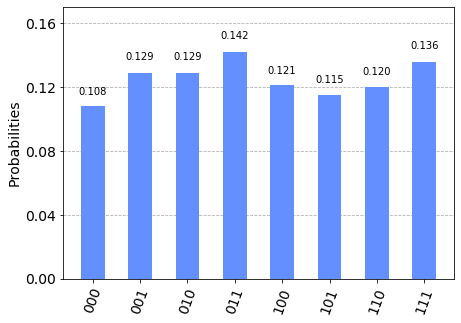

In [7]:
simulator = Aer.get_backend('qasm_simulator')
result = execute(circuit, backend=simulator, shots=1024).result()

plot_histogram(result.get_counts(circuit))

In [8]:
qcomp = provider.get_backend('ibmq_santiago')

In [13]:
# run the job on the backend qcomp
job = execute(circuit, backend=qcomp, shots=8000, initial_layout=[0,1,2], memory=True)
print(job.job_id())
job_monitor(job)

615dfeae73064c5350619ee3
Job Status: job has successfully run


In [15]:
result = job.result()
result.get_counts()

{'000': 1016,
 '001': 1040,
 '010': 1051,
 '011': 1034,
 '100': 955,
 '101': 962,
 '110': 982,
 '111': 960}

In [16]:
myjson = result.get_memory()

## 60% ( Deutsch-Jozsa Algorithm )

In [25]:
# qreg_q = QuantumRegister(4, 'q')
# creg_c = ClassicalRegister(4, 'c')
circuit = QuantumCircuit(4,4)

circuit.reset(qreg_q[0])
circuit.reset(qreg_q[1])
circuit.reset(qreg_q[2])
circuit.x(qreg_q[3])
circuit.h(qreg_q[0])
circuit.h(qreg_q[1])
circuit.h(qreg_q[2])
circuit.h(qreg_q[3])
circuit.barrier()

circuit.x(qreg_q[0])
circuit.x(qreg_q[2])
circuit.cx(qreg_q[0], qreg_q[3])
circuit.cx(qreg_q[1], qreg_q[3])
circuit.cx(qreg_q[2], qreg_q[3])

circuit.barrier()

circuit.x(qreg_q[0])
circuit.h(qreg_q[0])
circuit.h(qreg_q[1])
circuit.x(qreg_q[2])
circuit.h(qreg_q[2])

circuit.barrier()

circuit.measure(qreg_q[0], creg_c[0])
circuit.measure(qreg_q[1], creg_c[1])
circuit.measure(qreg_q[2], creg_c[2])

circuit.draw()

┌───┐ ░ ┌───┐                ░ ┌───┐┌───┐ ░ ┌─┐      
q_0: ─|0>─┤ H ├─░─┤ X ├──■─────────────░─┤ X ├┤ H ├─░─┤M├──────
          ├───┤ ░ └───┘  │             ░ ├───┤└───┘ ░ └╥┘┌─┐   
q_1: ─|0>─┤ H ├─░────────┼────■────────░─┤ H ├──────░──╫─┤M├───
          ├───┤ ░ ┌───┐  │    │        ░ ├───┤┌───┐ ░  ║ └╥┘┌─┐
q_2: ─|0>─┤ H ├─░─┤ X ├──┼────┼────■───░─┤ X ├┤ H ├─░──╫──╫─┤M├
     ┌───┐├───┤ ░ └───┘┌─┴─┐┌─┴─┐┌─┴─┐ ░ └───┘└───┘ ░  ║  ║ └╥┘
q_3: ┤ X ├┤ H ├─░──────┤ X ├┤ X ├┤ X ├─░────────────░──╫──╫──╫─
     └───┘└───┘ ░      └───┘└───┘└───┘ ░            ░  ║  ║  ║ 
c: 4/══════════════════════════════════════════════════╩══╩══╩═
                                                       0  1  2

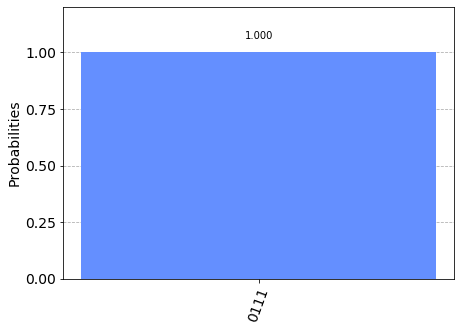

In [26]:
simulator = Aer.get_backend('qasm_simulator')
result = execute(circuit, backend=simulator, shots=1024).result()

plot_histogram(result.get_counts(circuit))

In [28]:
qcomp = provider.get_backend('ibmq_santiago')

# run the job on the backend qcomp
job = execute(circuit, backend=qcomp, shots=8000, initial_layout=[0,1,2,3], memory=True)
print(job.job_id())

job_monitor(job)

615e1122059e1b0d96a66a2e
Job Status: job has successfully run


In [29]:
result = job.result()
result.get_counts()

{'0000': 143,
 '0001': 243,
 '0010': 77,
 '0011': 538,
 '0100': 140,
 '0101': 1593,
 '0110': 251,
 '0111': 5015}

In [30]:
myjson = result.get_memory()

## 90% ( Not Gate )

In [21]:
qreg_q = QuantumRegister(3, 'q')
creg_c = ClassicalRegister(3, 'c')

circuit = QuantumCircuit(qreg_q, creg_c)

circuit.reset(qreg_q[0])
circuit.reset(qreg_q[1])
circuit.reset(qreg_q[2])
circuit.x(qreg_q[0])
circuit.x(qreg_q[1])
circuit.x(qreg_q[2])
circuit.measure(qreg_q[0], creg_c[0])
circuit.measure(qreg_q[1], creg_c[1])
circuit.measure(qreg_q[2], creg_c[2])

circuit.draw()

┌───┐┌─┐      
q_0: ─|0>─┤ X ├┤M├──────
          ├───┤└╥┘┌─┐   
q_1: ─|0>─┤ X ├─╫─┤M├───
          ├───┤ ║ └╥┘┌─┐
q_2: ─|0>─┤ X ├─╫──╫─┤M├
          └───┘ ║  ║ └╥┘
c: 3/═══════════╩══╩══╩═
                0  1  2

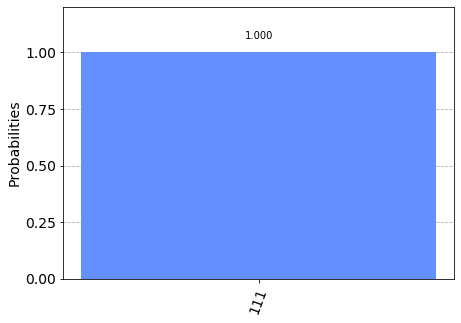

In [22]:
simulator = Aer.get_backend('qasm_simulator')
result = execute(circuit, backend=simulator, shots=1024).result()

plot_histogram(result.get_counts(circuit))

In [24]:
qcomp = provider.get_backend('ibmq_santiago')

# run the job on the backend qcomp
job = execute(circuit, backend=qcomp, shots=8000, initial_layout=[0,1,2], memory=True)
print(job.job_id())

job_monitor(job)

615fad93f9a6d9555a990b8f
Job Status: job has successfully run


In [28]:
result = job.result()
result.get_counts()

{'001': 7, '010': 7, '011': 217, '100': 2, '101': 153, '110': 175, '111': 7439}

In [17]:
myjson = result.get_memory()

## 90% ( Entanglement )

In [29]:
qreg_q = QuantumRegister(4, 'q')
creg_c = ClassicalRegister(4, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)

circuit.reset(qreg_q[0])
circuit.reset(qreg_q[1])
circuit.reset(qreg_q[2])
circuit.reset(qreg_q[3])
circuit.x(qreg_q[3])
circuit.cx(qreg_q[3], qreg_q[2])
circuit.cx(qreg_q[2], qreg_q[1])
circuit.cx(qreg_q[1], qreg_q[0])
circuit.measure(qreg_q[0], creg_c[0])
circuit.measure(qreg_q[1], creg_c[1])
circuit.measure(qreg_q[2], creg_c[2])

circuit.draw()

┌───┐┌─┐   
q_0: ─|0>────────────────┤ X ├┤M├───
                    ┌───┐└─┬─┘└╥┘┌─┐
q_1: ─|0>───────────┤ X ├──■───╫─┤M├
               ┌───┐└─┬─┘ ┌─┐  ║ └╥┘
q_2: ─|0>──────┤ X ├──■───┤M├──╫──╫─
          ┌───┐└─┬─┘      └╥┘  ║  ║ 
q_3: ─|0>─┤ X ├──■─────────╫───╫──╫─
          └───┘            ║   ║  ║ 
c: 4/══════════════════════╩═══╩══╩═
                           2   0  1

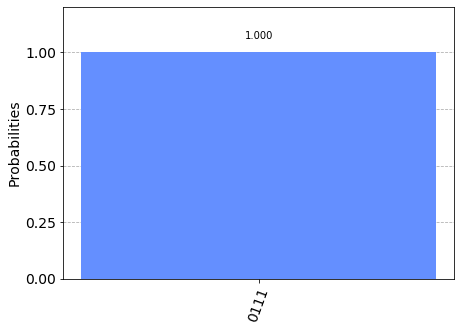

In [30]:
simulator = Aer.get_backend('qasm_simulator')
result = execute(circuit, backend=simulator, shots=1024).result()

plot_histogram(result.get_counts(circuit))

In [34]:
qcomp = provider.get_backend('ibmq_santiago')

In [35]:
job = execute(circuit, backend=qcomp, shots=8000, initial_layout=[0,1,2,3], memory=True)
print(job.job_id())

job_monitor(job)

615fb5b4a8477c3e9d7c6aba
Job Status: job has successfully run


In [36]:
result = job.result()
result.get_counts()

{'0000': 101,
 '0001': 11,
 '0010': 12,
 '0011': 192,
 '0100': 121,
 '0101': 152,
 '0110': 382,
 '0111': 7029}

In [37]:
myjson = result.get_memory()

### saving result

In [38]:
##download the result

import json
with open('data.json', 'w') as outfile:
    json.dump(myjson, outfile)